In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, KernelPCA

In [2]:
df = pd.read_table('del.txt')

In [3]:
pat = re.compile('-DEL.+')
df.columns = [pat.sub('', x) for x in df.columns.str.upper()]

# Clustering w/o PCA transformation

In [4]:
# dense_cor = pdist(scale(df.T), metric='correlation')
# cor_mat = squareform(dense_cor)

# Z = linkage(dense_cor, method='average')
# plt.figure(figsize=(25, 5))
# dn = dendrogram(Z)

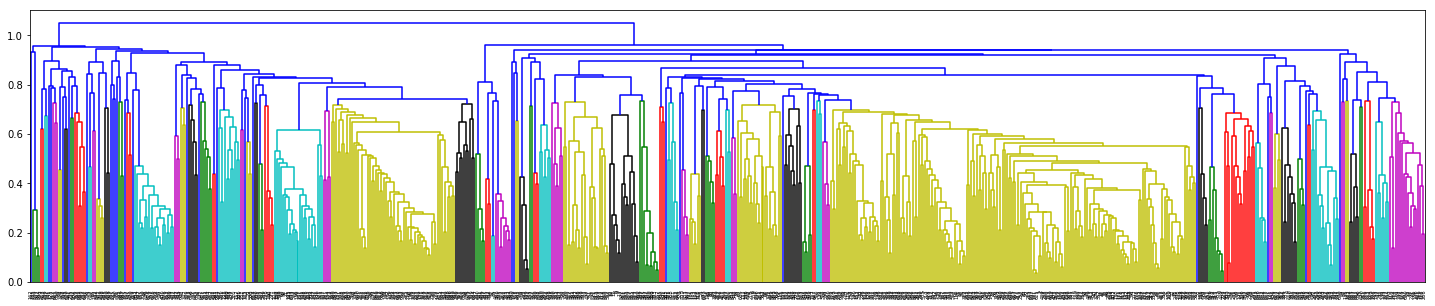

In [5]:
dense_cor = pdist(df.T, metric='correlation')
cor_mat = squareform(dense_cor)

Z = linkage(dense_cor, method='average')
plt.figure(figsize=(25, 5))
dn = dendrogram(Z)

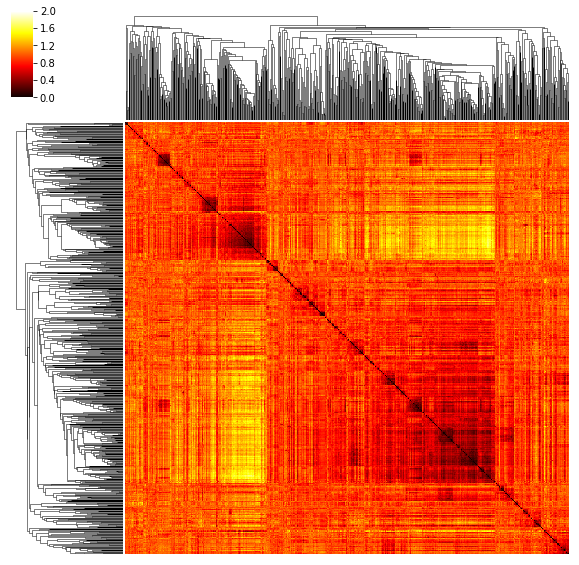

In [6]:
sns.clustermap(cor_mat, col_linkage=Z, row_linkage=Z, cmap='hot', vmin=0, vmax=2, xticklabels=False, yticklabels=False)

# Clustring w/ PCA transformation

In [7]:
model = PCA(n_components=100)
model.fit(df.T)
# top 100 PCs explained variance
sum(model.explained_variance_ratio_)

0.8925066402932171

In [8]:
X = model.transform(df.T)

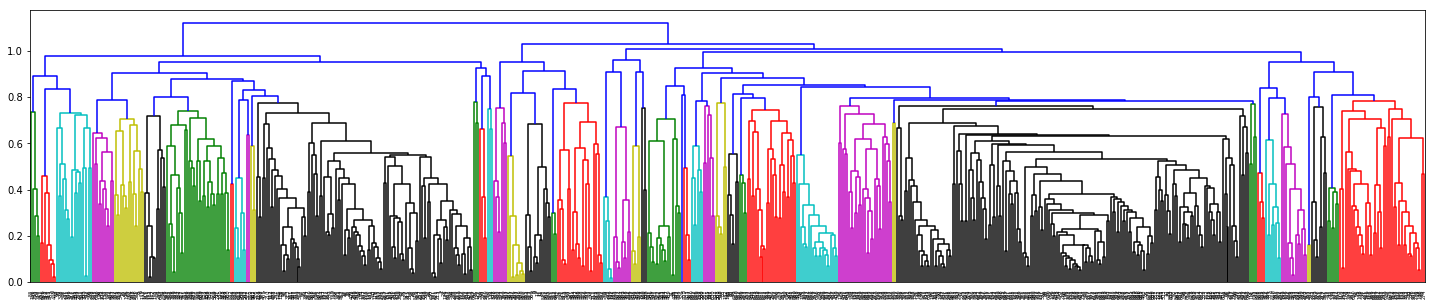

In [9]:
dense_cor = pdist(X, metric='correlation')
cor_mat = squareform(dense_cor)

Z = linkage(dense_cor, method='average')
plt.figure(figsize=(25, 5))
dn = dendrogram(Z)

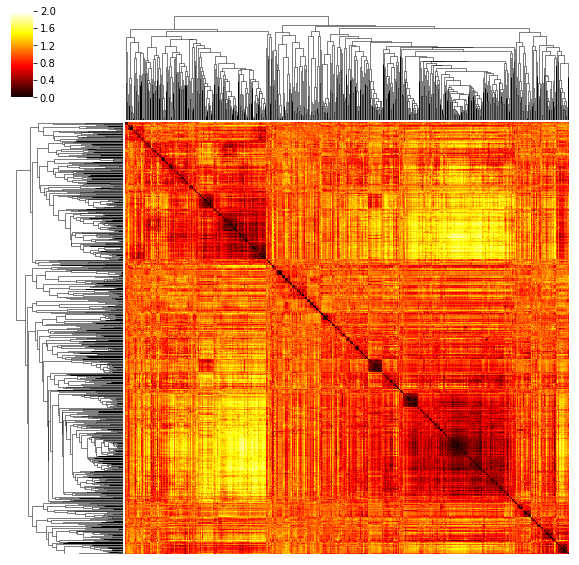

In [10]:
sns.clustermap(cor_mat, col_linkage=Z, row_linkage=Z, cmap='hot', vmin=0, vmax=2, xticklabels=False, yticklabels=False)